In [0]:
import zipfile
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path = '/content/drive/My Drive/Train.tar.zip'
with zipfile.ZipFile(train_path, 'r') as zip:
    zip.extractall()

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()


import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd

train_on_gpu = torch.cuda.is_available()

# DataLoaders

In [0]:
#For converting the dataset to torchvision dataset format
class DatasetLoader(Dataset):
    def __init__(self, file_path,label_path,train=True,transform=None):
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.label_path = label_path
        
        #self.data_info = pd.read_csv("/content/trainset.csv")
        self.data_info = pd.read_csv(self.label_path)

        self.data_info = self.data_info.sort_values(by = ['Data'])
        self.data_info = self.data_info.reset_index()

        #print(self.data_info.head())
        #self.data_info = self.data_info.drop('index', axis =1, inplace=True)
        
        self.file_names = [file for _,_,files in os.walk(self.file_path) for file in files]
        self.file_names = sorted(self.file_names)

        self.len = len(self.file_names)
        
        
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self,  index):
        file_name = self.file_names[index]
        image_data = self.pil_loader(self.file_path +"/" + file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            Y1 = self.get_classes(index)
            label = Y1
            return image_data, label
            
            

    
    
    def pil_loader(self, path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            image_data = img.convert('RGB')
            return image_data
    
    def get_classes(self, index):
        classs = self.data_info['Label'][index]
        return classs
    

# Transformation and Loading Data

In [0]:
transform = transforms.Compose([
                            # transforms.RandomResizedCrop(224),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    
                           # mean and std in 3 channels with mean and std of 0.5 an 0.5
])



In [0]:

full_data = DatasetLoader("/content/trainset","/content/trainset.csv", train=True,transform=transform)
train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_data, validation_data = random_split(full_data, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)

In [0]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)


torch.Size([64, 3, 618, 425]) torch.Size([64])


In [0]:
test_path = '/content/drive/My Drive/Test.tar.zip'
with zipfile.ZipFile(test_path, 'r') as zip:
    zip.extractall()

In [0]:
test_data = DatasetLoader("/content/testset","/content/testset.csv", train=True,transform=transform)


In [0]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [0]:
x, y = next(iter(test_loader))
print(x.shape, y.shape)


torch.Size([64, 3, 618, 425]) torch.Size([64])


# Loss , Model and Optimziers.

In [0]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from tqdm import tqdm_notebook

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
loss_fn_c = nn.CrossEntropyLoss()
model_c = models.resnet18(pretrained = True)
model_c.fc = nn.Linear(512,48,bias=True)
model_c.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
opt_c = optim.Adam(model_c.parameters())


# Training

In [0]:
loss_arr = []
n_iters = np.ceil(50000/ 64)
i= 0
for epoch in range(2):
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    c_out = model_c(inputs)
    opt_c.zero_grad()
    loss =  loss_fn_c(c_out, labels)
    loss.backward()
    opt_c.step()
    del inputs, labels
    loss_arr.append(loss.item())


    if i % 100 == 0:
        print("Iterations %d/%d loss = %0.2f"%(i, n_iters, loss.item()))
        
  print(loss.item()) 
  
    

Iterations 0/782 loss = 4.08
Iterations 100/782 loss = 0.10
0.04659054055809975
Iterations 0/782 loss = 0.04
Iterations 100/782 loss = 0.01
0.006893150508403778


# Checking with Validiation Data - 64 batch

In [0]:
sample_validiation_data , sample_validiation_label = next(iter(validation_loader))
sample_validiation_data, sample_validiation_label = sample_validiation_data.to(device), sample_validiation_label.to(device)

In [0]:
pred_val = model_c(sample_validiation_data)

In [0]:
 _, pred_v = torch.max(pred_val, 1)

In [0]:
pred_v

tensor([15, 18, 45, 44, 29, 26, 27, 12, 23, 23, 46, 19, 27, 11, 12, 38, 46,  6,
         5, 24, 29, 39, 39, 15, 39, 20, 11, 11, 34,  2, 27, 25,  4, 17, 17, 36,
        13, 30, 21, 20, 14,  5, 33, 47, 40, 13, 37, 27, 11, 29, 41, 35, 31, 36,
        33,  2, 41, 35, 17, 32, 44, 47, 46, 22], device='cuda:0')

In [0]:
sample_validiation_label

tensor([15, 18, 45, 44, 29, 26, 27, 12, 23, 23, 46, 19, 27, 11, 12, 38, 46,  6,
         5, 24, 29, 39, 39, 15, 39, 20, 11, 11, 34,  2, 27, 25,  4, 17, 17, 36,
        13, 30, 21, 20, 14,  5, 33, 47, 40, 13, 37, 27, 11, 29, 41, 35, 31, 36,
        33,  2, 41, 35, 17, 32, 44, 47, 46, 22], device='cuda:0')

# Saving the Model

In [0]:
checkpoint = {'model': model_c,
          'state_dict': model_c.state_dict(),
          'optimizer' : opt_c.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [0]:
import torch

# Loading Model

In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('checkpoint_best.pth')

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Test Accuracy

In [0]:
def evaluation(dataloader, model_c):
  total,v = 0,0
    

  for data in dataloader:
    inputs, labels = data
    #inputs, labels = inputs.to(device), labels.to(device)
    model_cpu = model_c.to("cpu")
    prediction = model_cpu(inputs)
    _, pred= torch.max(prediction, axis =1)

    total += labels.size(0)
    v += (pred==labels).sum().item()
    print(v)


  print('Test Accuracy: ',(v/total)*100, '%')

evaluation(test_loader,model)

64
128
192
256
320
384
448
512
576
640
704
768
832
895
959
1023
1087
1151
1215
1279
1343
1407
1471
1535
1599
1663
1727
1791
1855
1919
1983
2047
2111
2175
2238
2302
2366
2430
2494
2558
2607
Test Accuracy:  99.92334227673439 %


# Validation Accuracy

In [0]:
def evaluation(dataloader, model_c):
  total,v = 0,0
    

  for data in dataloader:
    inputs, labels = data
    #inputs, labels = inputs.to(device), labels.to(device)
    model_cpu = model_c.to("cpu")
    prediction = model_cpu(inputs)
    _, pred= torch.max(prediction, axis =1)

    total += labels.size(0)
    v += (pred==labels).sum().item()
    print(v)


  print('Validation Accuracy: ',(v/total)*100, '%')

evaluation(validation_loader,model)

64
128
192
256
320
384
448
512
576
640
704
768
832
896
960
Validation Accuracy:  100.0 %


# Test Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(7)


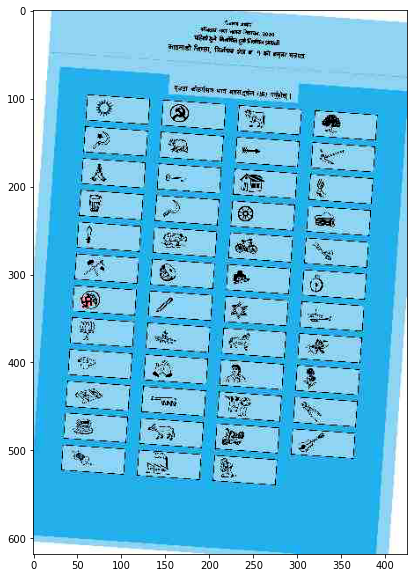

In [0]:
def get_image(loader):
  images, labels = next(iter(loader))
  index = np.random.randint(len(labels))
  return images[index], labels[index], images, labels, index

def show_image(image, label):    
  img = image
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1,2,0))
  plt.figure(figsize = (12,10))

  plt.imshow(npimg)
  print(label)

image, label,images, labels, index = get_image(test_loader)
show_image(image,label)

In [0]:
def predict(images, labels, index):
  indices, predicted = torch.max(model(images), 1)
  print("Predicted Class:", predicted[index].item())
  print("Actual Class:", labels[index].item())

predict(images, labels, index)

Predicted Class: 7
Actual Class: 7


In [0]:

outputs = model(images)
print(outputs.shape)

outputs = nn.functional.softmax(outputs, dim = 1)

#getting the maximum predicted label
prob_no_occ, pred = torch.max(outputs.data, 1)

#get the first item
prob_no_occ = prob_no_occ[0].item()

print(prob_no_occ)



torch.Size([64, 48])
0.9976947903633118


In [0]:
def occlusion(model, image, label, occ_size =50 , occ_stride=50, occ_pixel = 0.5):
  width, height = image.shape[-2], image.shape[-1]

  output_height = int(np.ceil((height -occ_size)/occ_stride))
  output_width = int(np.ceil((width - occ_size)/ occ_stride))

  heatmap = torch.zeros((output_height, output_width))

  for h in range(0, height):
    for w in range(0, width):
      h_start = h*occ_stride
      w_start = w*occ_stride
      h_end = min(height, h_start + occ_size)
      w_end = min(width, w_start + occ_size)

      if (w_end) >= width or (h_end) >= height:
        continue
      input_image = image.clone().detach()
      input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel
      output = model(input_image)
      output = nn.functional.softmax(output, dim=1)
      prob = output.tolist()[0][label]

      heatmap[h, w] = prob 

  return heatmap

In [0]:
heatmap = occlusion(model, images, pred[0].item(), 32, 14)

KeyboardInterrupt: ignored

In [0]:
import seaborn as sns